<a href="https://colab.research.google.com/github/Carter-Shaffer/Carter-Shaffer/blob/main/Copy_of_Student_Copy_of_s25_hw_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Logistic Regression

## Documentation

This assignment guides you through building a sentiment analysis model using Logistic Regression. Sentiment analysis determines the sentiment (positive or negative) expressed in text.  This is a binary classification problem.

**Learning Objectives**

By completing this assignment, you will:

*   Understand the machine learning model building process for text classification.
*   Preprocess text data for machine learning.
*   Implement a Logistic Regression model for sentiment analysis using scikit-learn.
*   Evaluate model performance.

**Tools and Libraries**

*   **scikit-learn (sklearn):** Machine learning library.
*   **pandas:** Data manipulation and analysis.
*   **NLTK:** Natural Language Toolkit (for dataset and stopwords).
*   **seaborn, matplotlib:** For visualization.

**Dataset**

We will use the `movie_reviews` corpus from the NLTK library.  This dataset contains movie reviews labeled as positive or negative.

**Assignment Structure**

1.  **Setup and Data Loading:** Download necessary NLTK data and load the dataset.
2.  **Data Exploration:**  Examine the dataset.
3.  **Text Preprocessing:**
    *   **Bag of Words (CountVectorizer):** Convert text to numerical vectors.
    *   **TF-IDF Vectorizer:**  Consider word importance.
4.  **Splitting Data:** Create training and testing sets.
5.  **Model Training:** Train a Logistic Regression model.
6.  **Model Evaluation:** Evaluate performance.


## 1. Setup and Data Loading

We need to download the `movie_reviews` corpus and the `stopwords` list from NLTK.

In [12]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt  # Import for visualization

# Download required NLTK resources (only needs to be done once)
nltk.download('movie_reviews', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

from nltk.corpus import movie_reviews, stopwords  # Import stopwords
from nltk.tokenize import word_tokenize # Import word_tokenize

# 1.1 Load the raw data
# This loads the movie_reviews dataset from NLTK, which contains movie reviews
# labeled as positive ('pos') or negative ('neg').  The data is initially
# stored as a list of tuples: (list_of_words, sentiment_label).

print("Loading raw data from NLTK movie_reviews corpus...")
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

# 1.2 Show the first 5 raw data entries
# This section prints the first 5 entries of the raw data *before* it's converted
# into a DataFrame.  This helps visualize the initial format: a list of words
# and the associated sentiment category.  We show only the first 20 words of each review
# for brevity.

print("\nFirst 5 raw data entries (before DataFrame conversion):")
for i in range(5):
    print(f"Entry {i+1}:")
    print(f"  Words (first 20): {documents[i][0][:20]}...")  # Show only first 20 words
    print(f"  Category: {documents[i][1]}")

# 1.3 Convert to a Pandas DataFrame
# This cell converts the raw data (list of tuples) into a Pandas DataFrame.
# DataFrames are structured tables, making data manipulation and analysis easier.
# The DataFrame will have two columns: 'words' (containing the list of words) and
# 'sentiment' (containing the category, 'pos' or 'neg').

print("\nConverting to Pandas DataFrame...")
reviews_df = pd.DataFrame(documents, columns=['words', 'sentiment'])
print("\nDataFrame after initial creation:")
print(reviews_df.head())

# 1.4 Convert word lists to strings
# This cell converts the lists of words in the 'words' column into single strings.
# Most machine learning models work with numerical or string data, not lists.  The
# `words_to_string` function joins the words with spaces.  The `.apply()` method
# applies this function to each row in the 'words' column. We then drop original
# 'words' column, as it is no longer needed.
# We handle potential errors by returning an empty string if a cell doesn't contain a list.

def words_to_string(word_list):
    if isinstance(word_list, list):
        return ' '.join(word_list)
    else:
        return ''  # Or some other default value for non-list entries

print("\nConverting lists of words to strings...")
reviews_df['review'] = reviews_df['words'].apply(words_to_string)
reviews_df = reviews_df.drop('words', axis=1) #Drop the word list
print("\nDataFrame after converting 'words' to 'review' strings:")
print(reviews_df.head())


# 1.5 Convert sentiment labels to numerical (0 and 1)
# Machine learning models typically require numerical input. This cell converts
# the sentiment labels from strings ('pos' and 'neg') to numerical values (1 and 0).
# 'pos' becomes 1, and 'neg' becomes 0.  This is done using a lambda function and
# the `.apply()` method.

print("\nConverting sentiment labels to numerical (0 and 1)...")


# TODO: Write the lambda function that goes in .apply() such that all positive reviews get a 1 and negative reviews get a 0
# HINT: lambda x:


reviews_df['sentiment'] = reviews_df['sentiment'].apply(lambda x: 1 if x == "pos" else 0)
print("\nFinal DataFrame structure:")
print(reviews_df.head())

print("\nDataset loaded and preprocessed successfully!")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Loading raw data from NLTK movie_reviews corpus...

First 5 raw data entries (before DataFrame conversion):
Entry 1:
  Words (first 20): ['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an']...
  Category: neg
Entry 2:
  Words (first 20): ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', 'review', 'damn', 'that', 'y2k', 'bug', '.', 'it', "'", 's', 'got', 'a', 'head', 'start']...
  Category: neg
Entry 3:
  Words (first 20): ['it', 'is', 'movies', 'like', 'these', 'that', 'make', 'a', 'jaded', 'movie', 'viewer', 'thankful', 'for', 'the', 'invention', 'of', 'the', 'timex', 'indiglo', 'watch']...
  Category: neg
Entry 4:
  Words (first 20): ['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', 'bros', '.', "'", 'first', 'feature', '-', 'length', ',', 'fully', '-', 'animated', 'attempt', 'to']...
  Category: neg
Entry 5:
  Words (first 20): ['synopsis', ':', 'a', 'mentally', 'unstable', 'man'

## Short Answer 1:

### Why is it necessary to convert the sentiment labels ('pos', 'neg') into numerical values (0, 1)?

Write your answer here

This is an essential part of our preprocessing because of the numerical values importance for our loss function and other mathmatical operations.


# 2. Data Exploration

1.   **Sentiment Distribution:** Visualize and understand the balance of positive/negative reviews.
2.    **Review Length Analysis:** Explore the relationship between review length and sentiment.
3.   **Most Frequent Words:** Identify common words in positive and negative reviews.

This section focuses on exploratory data analysis (EDA).  Before building a model, it's essential to understand the characteristics of the dataset. We'll examine the distribution of sentiments (are there more positive or negative reviews?),
investigate if review length correlates with sentiment, and identify the most
frequent words associated with each sentiment. This exploration helps us
gain insights into the data, identify potential biases, and inform feature
engineering decisions.  It's a crucial step in ensuring we build a robust and
reliable sentiment analysis model.



2.1 Sentiment Distribution:
sentiment
0    1000
1    1000
Name: count, dtype: int64


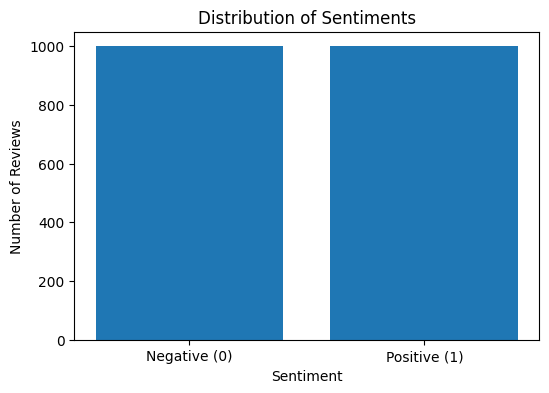


2.2 Review Length Analysis:
                                              review  review_length  sentiment
0  plot : two teen couples go to a church party ,...           4061          0
1  the happy bastard ' s quick movie review damn ...           1382          0
2  it is movies like these that make a jaded movi...           2858          0
3  " quest for camelot " is warner bros . ' first...           2983          0
4  synopsis : a mentally unstable man undergoing ...           4440          0


<Figure size 800x600 with 0 Axes>

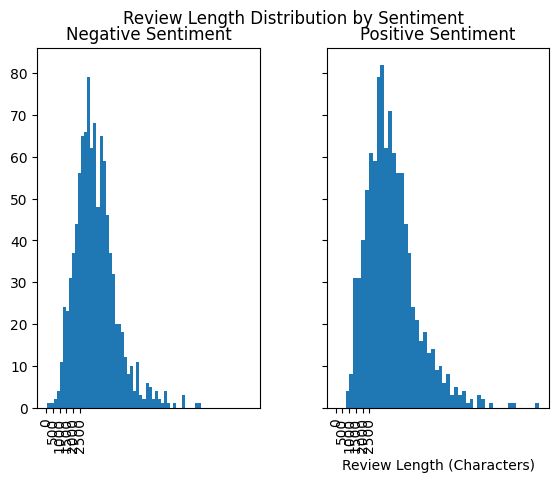


Review Length Statistics:
            count      mean          std    min      25%     50%      75%  \
sentiment                                                                   
0          1000.0  3673.558  1535.991157   91.0  2673.00  3463.0  4420.25   
1          1000.0  4134.962  1855.999293  740.0  2838.75  3855.5  5027.50   

               max  
sentiment           
0          11451.0  
1          15097.0  

2.3 Most Frequent Words:

Most frequent words in positive reviews:
[('film', 5230), ('one', 3052), ('movie', 2525), ('like', 1802), ('good', 1248), ('story', 1246), ('time', 1243), ('also', 1200), ('even', 1179), ('well', 1123), ('character', 1078), ('life', 1057), ('much', 1038), ('would', 1019), ('first', 1004), ('two', 999), ('characters', 986), ('see', 965), ('way', 929), ('get', 897)]

Most frequent words in negative reviews:
[('film', 4287), ('movie', 3246), ('one', 2800), ('like', 1888), ('even', 1386), ('time', 1168), ('good', 1163), ('would', 1090), ('get', 1052),

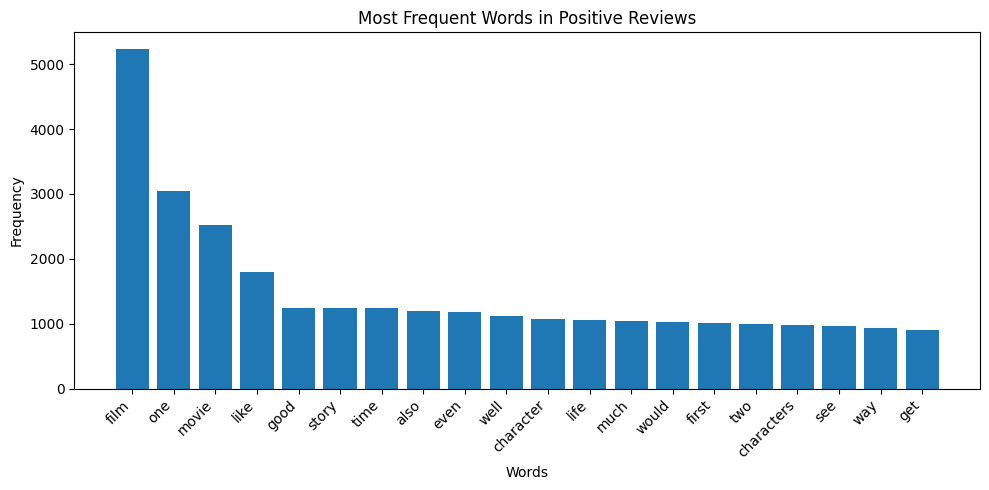

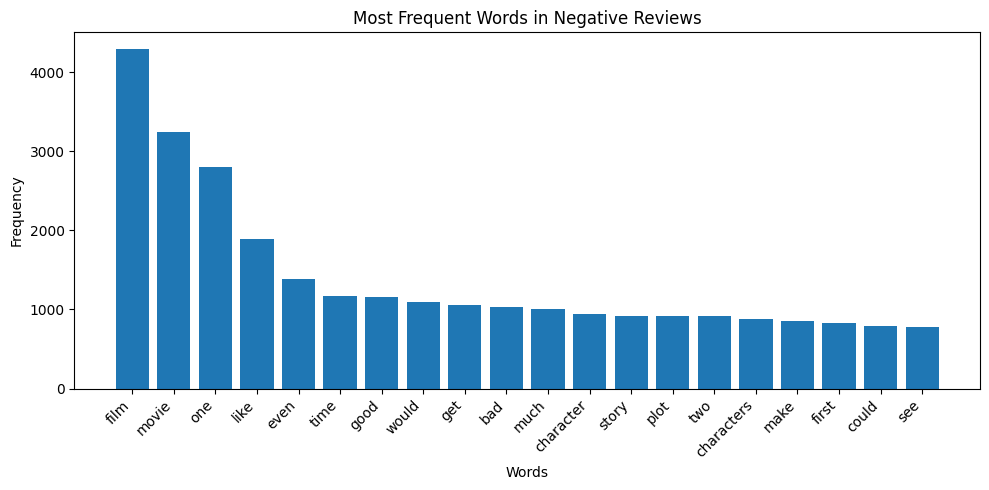

In [13]:
# 2.1 Sentiment Distribution
# This section visualizes the distribution of positive and negative reviews in the dataset.
# Understanding the class balance is important.  A highly imbalanced dataset (e.g., 90% positive,
# 10% negative) might require different handling than a balanced one.

print("\n2.1 Sentiment Distribution:")
sentiment_counts = reviews_df['sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xticks(sentiment_counts.index, ['Negative (0)', 'Positive (1)'])  # Clearer labels
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments')
plt.show()

# 2.2 Review Length Analysis
# This part explores the lengths of the reviews.  Review length *might* be correlated with sentiment.
# For example, very short reviews could be less informative, or extremely long reviews might
# be more likely to be negative (if people are complaining at length).  This is just an
# exploration, and it's not guaranteed to be a strong feature.

print("\n2.2 Review Length Analysis:")
reviews_df['review_length'] = reviews_df['review'].apply(len)
print(reviews_df[['review', 'review_length', 'sentiment']].head())

plt.figure(figsize=(8, 6))
reviews_df.hist(column='review_length', by='sentiment', bins=50, sharex=True, sharey=True)
plt.suptitle('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (Characters)')
plt.ylabel('Number of Reviews')

# Add custom x-axis labels for clarity
plt.subplot(1, 2, 1)  # Negative sentiment (0)
plt.xticks([0, 500, 1000, 1500, 2000, 2500])
plt.title("Negative Sentiment")
plt.subplot(1, 2, 2) #Positive Sentiment (1)
plt.xticks([0, 500, 1000, 1500, 2000, 2500])
plt.title("Positive Sentiment")

plt.show()

print("\nReview Length Statistics:")
print(reviews_df.groupby('sentiment')['review_length'].describe())


# 2.3 Most Frequent Words (Optional, but insightful)
# This section identifies the most frequent words in positive and negative reviews.  This helps
# understand the vocabulary associated with each sentiment.  Stop words (common words like "the", "a",
# "is") are removed to focus on more meaningful terms.  This uses the `word_tokenize` function
# from NLTK to split the reviews into individual words.

from collections import Counter

print("\n2.3 Most Frequent Words:")

stop_words = set(stopwords.words('english'))

def get_most_common_words(reviews, sentiment, num_words=20):
    """Gets the most common words for a specific sentiment."""
    words = []
    for review in reviews[reviews['sentiment'] == sentiment]['review']:
        words.extend([word.lower() for word in word_tokenize(review) if word.isalpha() and word.lower() not in stop_words])
    return Counter(words).most_common(num_words)

# Most frequent words in positive reviews
positive_words = get_most_common_words(reviews_df, 1)
print("\nMost frequent words in positive reviews:")
print(positive_words)

# Most frequent words in negative reviews
negative_words = get_most_common_words(reviews_df, 0)
print("\nMost frequent words in negative reviews:")
print(negative_words)

# Visualization of most frequent words
def plot_most_common_words(word_counts, title):
    words, counts = zip(*word_counts) #unzips the list of tuples into two lists
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha="right")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_most_common_words(positive_words, "Most Frequent Words in Positive Reviews")
plot_most_common_words(negative_words, "Most Frequent Words in Negative Reviews")

## Short Answer 2:

### What are some of your initial observations based on this data?

Write your answer here

My initial observations in this data are as follows:

1. we have an equal number of "pos" and "neg" sentiment reviews
2. the distribustions of the lengths of distribustions are similar, with positive reviews having a slightly longer bias.
3. many of the most frequent words are seen in both "pos" and "neg" reviews so we may have to be careful while training our model.



# 3. Text Preprocessing

Before we can train a machine learning model, we need to convert the text data
into a numerical format. Machine learning models cannot directly process raw text.
This section covers two common techniques for text vectorization:
1. **Bag of Words (CountVectorizer):** Convert text to numerical vectors.
2. **TF-IDF Vectorizer:**  Consider word importance.

These techniques create a numerical representation of each review, where each number represents the
presence, frequency, or importance of a particular word in the review. This
numerical representation is what our Logistic Regression model will use to
learn the relationship between the words and the sentiment. This step is
*crucial* because the quality of our feature representation directly impacts
the model's ability to learn and make accurate predictions. Without this step,
we wouldn't be able to use the text data for classification.

You may find this link helpful:
1. https://scikit-learn.org/stable/modules/feature_extraction.html


In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np  # Import numpy

# Set a random seed for reproducibility
np.random.seed(42)

# 3.1 Bag of Words (CountVectorizer)
"""(Docstring as before)"""

print("\n3.1 Bag of Words (CountVectorizer):")

# TODO: Initialize a `CountVectorizer` with the following parameters: `stop_words='english'`, `max_features=1500`, `binary=True`.
# Then, fit and transform the 'review' column of `reviews_df` to create `bow_features`.

bow_vectorizer = CountVectorizer(stop_words='english', max_features=1500, binary=True)
bow_features = bow_vectorizer.fit_transform(reviews_df['review'])

print(f"Shape of BoW features: {bow_features.shape}") #This will now error out correctly.
print(f"Type of BoW features: {type(bow_features)}")

# Find indices of positive and negative reviews
positive_review_indices = reviews_df[reviews_df['sentiment'] == 1].index
negative_review_indices = reviews_df[reviews_df['sentiment'] == 0].index

# Get indices of "good" and "bad"
#The lines below will cause an error until bow_vectorizer is properly defined.
try:
    good_index = list(bow_vectorizer.get_feature_names_out()).index("good")
    bad_index = list(bow_vectorizer.get_feature_names_out()).index("bad")
except AttributeError as e:
    if "'NotImplementedError' object has no attribute 'get_feature_names_out'" in str(e):
        raise NotImplementedError("You must first initialize 'bow_vectorizer' correctly.") from e
    else:
        raise e # Re-raise if not the expected error


# Find a good positive review (contains "good", doesn't contain "bad")
for i in positive_review_indices:
    if bow_features[i, good_index] == 1 and bow_features[i, bad_index] == 0:
        good_positive_index = i
        break
else:  # No such review found (very unlikely, but good practice)
    good_positive_index = positive_review_indices[0]

# Find a good negative review (contains "bad", doesn't contain "good")
for i in negative_review_indices:
    if bow_features[i, bad_index] == 1 and bow_features[i, good_index] == 0:
        good_negative_index = i
        break
else:  # No such review found
    good_negative_index = negative_review_indices[0]


print("\nBoW Example:")
print(f"Word 'good' has index: {good_index}")
print(f"Word 'bad' has index: {bad_index}")

print(f"\nPositive Review (index {good_positive_index}):")
print(f"  'good' presence: {bow_features[good_positive_index, good_index]}")
print(f"  'bad' presence: {bow_features[good_positive_index, bad_index]}")

print(f"\nNegative Review (index {good_negative_index}):")
print(f"  'good' presence: {bow_features[good_negative_index, good_index]}")
print(f"  'bad' presence: {bow_features[good_negative_index, bad_index]}")


# 3.2 TF-IDF (TfidfVectorizer)
"""(Docstring as before)"""

print("\n3.2 TF-IDF (TfidfVectorizer):")
# TODO: Initialize a `TfidfVectorizer` with `stop_words='english'` and `max_features=1500`. Then, fit and transform the 'review' column to create `tfidf_features`.

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1500)
tfidf_features = tfidf_vectorizer.fit_transform(reviews_df['review'])

print(f"Shape of TF-IDF features: {tfidf_features.shape}")
print(f"Type of TF-IDF features: {type(tfidf_features)}")

# Get indices of "good" and "bad"
#The lines below will cause an error until tfidf_vectorizer is properly defined.
try:
    good_index_tfidf = list(tfidf_vectorizer.get_feature_names_out()).index("good")
    bad_index_tfidf = list(tfidf_vectorizer.get_feature_names_out()).index("bad")
except AttributeError as e:
    if "'NotImplementedError' object has no attribute 'get_feature_names_out'" in str(e):
         raise NotImplementedError("You must first initialize 'tfidf_vectorizer' correctly.") from e
    else:
        raise e

# Find a good positive review (high "good" TF-IDF, low "bad" TF-IDF)
best_positive_tfidf = -1
good_positive_index_tfidf = positive_review_indices[0] #initialize
for i in positive_review_indices:
    score_diff = tfidf_features[i, good_index_tfidf] - tfidf_features[i, bad_index_tfidf]
    if score_diff > best_positive_tfidf:
        best_positive_tfidf = score_diff
        good_positive_index_tfidf = i

# Find a good negative review (high "bad" TF-IDF, low "good" TF-IDF)
best_negative_tfidf = -1
good_negative_index_tfidf = negative_review_indices[0]


3.1 Bag of Words (CountVectorizer):
Shape of BoW features: (2000, 1500)
Type of BoW features: <class 'scipy.sparse._csr.csr_matrix'>

BoW Example:
Word 'good' has index: 572
Word 'bad' has index: 102

Positive Review (index 1002):
  'good' presence: 1
  'bad' presence: 0

Negative Review (index 7):
  'good' presence: 0
  'bad' presence: 1

3.2 TF-IDF (TfidfVectorizer):
Shape of TF-IDF features: (2000, 1500)
Type of TF-IDF features: <class 'scipy.sparse._csr.csr_matrix'>


## Short Answer 3:

### In your own words, explain how both CountVectorizer (with binary=True) and TfidfVectorizer transform text data into a numerical representation.  Describe the meaning of the numbers in the resulting matrices for each method. How do these two methods differ, and what are the advantages/disadvantages of each?

Write your answer here

CountVectorizer transforms words into numbers by scanning the movie review strings and creating a vocabulary of all the unique words. From this vocabulary it then checks if a word in the vocabulary is in the review and outputs 1 if in and 0 if not. TfidfVectorizer similarly creates a vocabulary of unique words but instead of checking simply for if a word is in the review, it calculates a score based on its frequency and how rare a word is in all reviews. The main advantage/disadvantages between the two are that CountVectorizer may be much more efficient at times, whereas TfidfVectorzer probably does a better job of realizing the importance of each word/



## Output Summary

Assuming you correctly implemented the code, the Bag of Words (BoW) and TF-IDF vectorizers transformed the text reviews into numerical matrices.  Both matrices have a shape of (2000, 2000), representing 2000 reviews and 2000 features (words).  Crucially, we examined the presence/absence (BoW) and TF-IDF scores of the words "good" and "bad" in a sample positive and a sample negative review.  We expect "good" to be more prominent in positive reviews and "bad" in negative reviews.  The output confirms this: in the BoW example, "good" is present (1) in the positive review and absent (0) in the negative review, while the opposite is true for "bad".  Similarly, in the TF-IDF example, "good" has a higher score in the positive review than the negative, and "bad" has a higher score in the negative review. This demonstrates how these numerical representations capture sentiment-related information.

## 4. Splitting Data

Before training the model, we need to split our data into training and testing sets.
The training set is used to train the Logistic Regression model, while the
testing set is used to evaluate its performance on unseen data. This is crucial
to assess how well our model generalizes to new, previously unseen reviews.  We
use a common split ratio of 80% for training and 20% for testing.  `train_test_split`
from scikit-learn handles this splitting and ensures that the data is shuffled
randomly before splitting, which helps prevent bias. We set `random_state` for reproducibility.

We will perform this splitting on *both* the BoW features and the TF-IDF features,
creating separate training and testing sets for each representation. This allows us to
compare the performance of the model using different feature sets.

In [16]:
from sklearn.model_selection import train_test_split

# Split data using BoW features
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(
    bow_features, reviews_df['sentiment'], test_size=0.2, random_state=42
)

# Split data using TF-IDF features
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    tfidf_features, reviews_df['sentiment'], test_size=0.2, random_state=42
)

print("\nBoW Data Split:")
print(f"  X_bow_train shape: {X_bow_train.shape}")
print(f"  X_bow_test shape: {X_bow_test.shape}")
print(f"  y_bow_train shape: {y_bow_train.shape}")
print(f"  y_bow_test shape: {y_bow_test.shape}")

print("\nTF-IDF Data Split:")
print(f"  X_tfidf_train shape: {X_tfidf_train.shape}")
print(f"  X_tfidf_test shape: {X_tfidf_test.shape}")
print(f"  y_tfidf_train shape: {y_tfidf_train.shape}")
print(f"  y_tfidf_test shape: {y_tfidf_test.shape}")


BoW Data Split:
  X_bow_train shape: (1600, 1500)
  X_bow_test shape: (400, 1500)
  y_bow_train shape: (1600,)
  y_bow_test shape: (400,)

TF-IDF Data Split:
  X_tfidf_train shape: (1600, 1500)
  X_tfidf_test shape: (400, 1500)
  y_tfidf_train shape: (1600,)
  y_tfidf_test shape: (400,)


The output shows the shapes of the resulting training and testing sets for both BoW and TF-IDF.

*   **X_..._train:**  The feature matrices used for training (80% of the data).
*   **X_..._test:**  The feature matrices used for testing (20% of the data).
*   **y_..._train:** The sentiment labels (0 or 1) corresponding to the training data.
*   **y_..._test:** The sentiment labels corresponding to the testing data.

We expect the training sets to have 1600 reviews (80% of 2000) and the testing
sets to have 400 reviews (20% of 2000).  The number of features (columns) should
match the number of features we defined earlier (2000). The shapes confirm that
the splitting was done correctly.

## 5. Model Training

We use scikit-learn's `LogisticRegression` class.  You will need to initialize
and train the models.

**Instructions:**

1.  **Import `LogisticRegression`:** Import the necessary class from scikit-learn.  (This has already been done for you at the top of the notebook).
2.  **Initialize the Models:** Create two instances of the `LogisticRegression` class: one for the BoW model and one for the TF-IDF model.  Name them `bow_model` and `tfidf_model`, respectively.
3.  **Set Parameters:** When initializing the models, set the following parameters:
    *   `solver='liblinear'`: This solver is a good choice for smaller datasets and works well with both L1 and L2 regularization.  See the documentation for details on other solvers.
    *   `random_state=42`:  This ensures reproducibility.  Setting a random state means that the results will be the same every time you run the code, even though there's randomness involved in the model training process.
4.  **Train the Models:** Use the `.fit()` method of each model to train it on the appropriate training data.  Remember that you have separate training data for BoW (`X_bow_train`, `y_bow_train`) and TF-IDF (`X_tfidf_train`, `y_tfidf_train`).

**Documentation:**

Refer to the scikit-learn documentation for `LogisticRegression`:
[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

Pay particular attention to the descriptions of the `solver` and `random_state` parameters. You can also explore other parameters, but for this assignment, we'll focus on these two.

In [17]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression with BoW features
bow_model = LogisticRegression(solver='liblinear', random_state=42)
bow_model.fit(X_bow_train, y_bow_train)
print("\nBoW Model Trained!")

# Train Logistic Regression with TF-IDF features
tfidf_model = LogisticRegression(solver='liblinear', random_state=42)
tfidf_model.fit(X_tfidf_train, y_tfidf_train)
print("TF-IDF Model Trained!")


BoW Model Trained!
TF-IDF Model Trained!


## 6. Model Evaluation

Now that we've trained our models, we need to evaluate their performance. We use
several common metrics for classification tasks:

*   **Accuracy:** The proportion of correctly classified reviews (both positive and negative).
*   **Precision:**  Out of all reviews predicted as positive, what proportion were *actually* positive?  Measures the model's ability to avoid false positives.
*   **Recall:** Out of all *actually* positive reviews, what proportion were predicted as positive? Measures the model's ability to find all positive instances.
*   **F1-score:** The harmonic mean of precision and recall.  A balanced measure that considers both false positives and false negatives.
*   **Confusion Matrix:** A table that visualizes the performance of a classification model. It shows the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

We'll calculate these metrics for both the BoW model and the TF-IDF model, using
the *testing* data (which the models haven't seen during training). This gives us
an unbiased estimate of how well the models generalize to new data.  We use
scikit-learn's `classification_report` for a concise summary of the metrics and
`confusion_matrix` for the confusion matrix. We also create a heatmap of the confusion matrix for easy visualization.


In [21]:
# Evaluate CountVectorizer model
y_pred_counts = logistic_regression_counts.predict(X_test)
accuracy_counts = accuracy_score(y_test, y_pred_counts)
conf_matrix_counts = confusion_matrix(y_test, y_pred_counts)
class_report_counts = classification_report(y_test, y_pred_counts)

print("--- CountVectorizer Model Evaluation ---")
print(f"Accuracy: {accuracy_counts:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_counts)
print("\nClassification Report:\n", class_report_counts)

# Plot Confusion Matrix for CountVectorizer
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_counts, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - CountVectorizer')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()


# --- Now evaluate the TfidfVectorizer model ---
# First, split the TF-IDF data, using the *same* random_state
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, reviews_df['sentiment'], test_size=0.2, random_state=42
)
# Train the TfidfVectorizer model
logistic_regression_tfidf = LogisticRegression(max_iter=1000)
logistic_regression_tfidf.fit(X_train_tfidf, y_train) #use the same y_train

y_pred_tfidf = logistic_regression_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)


print("\n--- TfidfVectorizer Model Evaluation ---")
print(f"Accuracy: {accuracy_tfidf:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_tfidf)
print("\nClassification Report:\n", class_report_tfidf)

# Plot Confusion Matrix for TfidfVectorizer
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap="Greens",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - TfidfVectorizer')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

NameError: name 'logistic_regression_counts' is not defined

## Short Answer 4
### Evaluate the models' performances and compare them to each other

Write your answer here